
# **Assignment 1**


## Task 1. Correlation
We will use the data example from the textbook "Statistical Analysis with The General Linear Model" by Miller and Haden (2013), Chapter 11.

As in Miller and Haden, we have five columns:

-Participant (Participant),

-Reading Ability (Abil),

-Intelligence (IQ),

-Number of minutes spent reading at home per week (Home),

-Number of minutes spent watching TV per week (TV).


For the task we will focus on the relationship between Reading Ability and IQ, but for further practice you can look at other relationships on your own.

**Question 1**:

a. Check whether the data is interval, ratio, or ordinal.

b. Check whether there is a data point for each participant on both variables.

c. Check whether the data is normally distributed in both variables.

d. Create a scatter plot with Reading Ability being the x-axis and IQ, being the y-axis.

e. Draw a correlation line on the scatter plot.


**Instructions:**

1. Load the necessary libraries and explain why you need them ("#used for ...").

2. Read the MillerHadenData.csv file into a DataFrame and name it "df_mh".

In [68]:
import pandas as pd # used for data wrangling
import seaborn as sns # used for visualization
import matplotlib  # used for plotting
from matplotlib import pyplot as plt # used for creating plots
import pylab # used for additional plotting functionalities
import pingouin as pg # used for statistical analysis

df_mh = pd.read_csv('MillerHadenData.csv')

In [69]:
# Q1a (code):
# Display first few rows of the dataframe
print(df_mh.head())

# Check data types and information
data_types = df_mh.dtypes
print(data_types)


   Participant  Abil   IQ  Home   TV
0            1    61  107   144  487
1            2    56  109   123  608
2            3    45   81   108  640
3            4    66  100   155  493
4            5    49   92   103  636
Participant    int64
Abil           int64
IQ             int64
Home           int64
TV             int64
dtype: object


In [70]:
# Q1a (answer):
# Based on the reported results:The "Participant" column contains unique identifiers for each participant, which have no quantitative meaning. As a result, this column has ordinal values.The columns "Abil", "IQ", "Home", and "TV" contain numerical data that indicate reading ability, intellect, the number of minutes spent reading at home per week, and the number of minutes spent watching TV per week. These columns are classified as interval or ratio data because they contain numerical values that may be compared and mathematical operations are performed on them.
# "Participant" data is ordinal.
# "Abil", "IQ", "Home", and "TV" data are interval or ratio.

In [71]:
# Q1b (code):
# Check for missing values
missing_values = df_mh.isnull().sum()

if missing_values.sum() == 0:
    print("There are no missing values in the dataset.")
else:
    print("There are missing values in the dataset.")

    
# Check whether there is a data point for each participant on both variables
participants_ab = df_mh['Participant'].nunique()
participants_reading = df_mh['Abil'].nunique()

if participants_ab == participants_reading:
    print("There is a data point for each participant on both variables.")
else:
    print("There is not a data point for each participant on both variables.")

There are no missing values in the dataset.
There is not a data point for each participant on both variables.


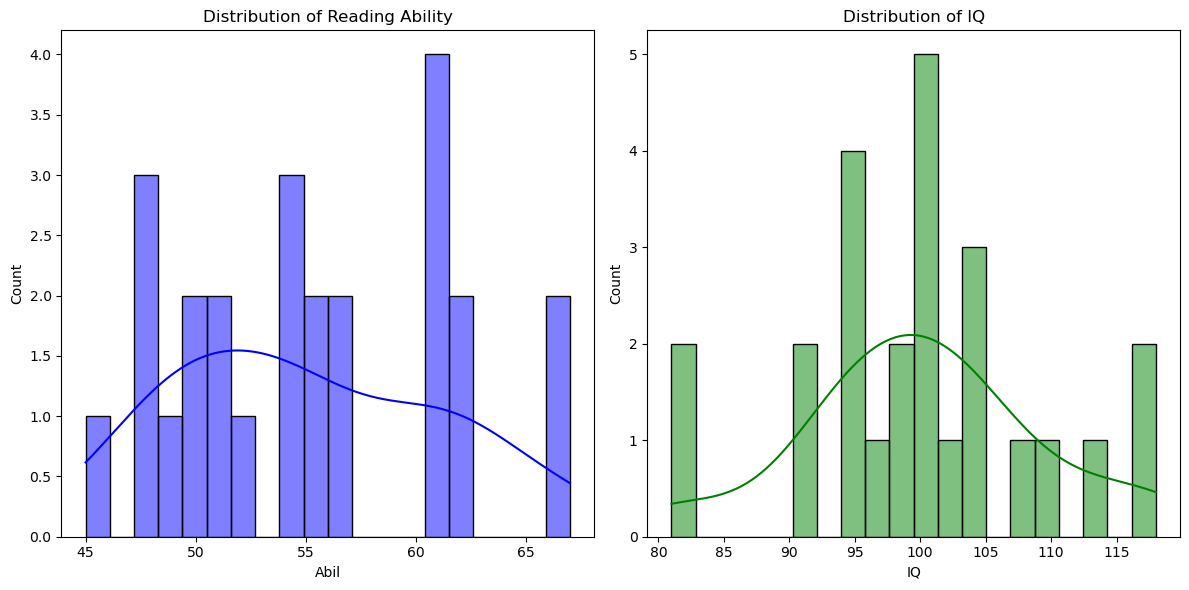

Normality test results for Reading Ability:
             W      pval  normal
Abil  0.948795  0.235491    True

Normality test results for IQ:
           W      pval  normal
IQ  0.963604  0.490811    True


In [72]:
# Q1c (code):
# Check data distribution

# Visualize the distribution of data using histograms
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_mh['Abil'], kde=True, color='blue', bins=20)
plt.title('Distribution of Reading Ability')

plt.subplot(1, 2, 2)
sns.histplot(df_mh['IQ'], kde=True, color='green', bins=20)
plt.title('Distribution of IQ')

plt.tight_layout()
plt.show()

# Conduct normality tests
abil_normality = pg.normality(df_mh['Abil'])
iq_normality = pg.normality(df_mh['IQ'])

print("Normality test results for Reading Ability:")
print(abil_normality)

print("\nNormality test results for IQ:")
print(iq_normality)

In [73]:
# Q1c (answer):
# Based on the results of the normality tests and the generated histograms:For the "Reading Ability" variable, the p-value of the normality test is 0.235491, which is much larger than the commonly used significance level (e.g., 0.05). Therefore, we do not have enough evidence to reject the hypothesis that this variable follows a normal distribution.For the "IQ" variable, the p-value of the normality test is 0.490811, similarly much larger than the significance level, indicating that we do not have enough evidence to reject the hypothesis that this variable follows a normal distribution.
# Hence, we can conclude: the data is normally distributed in both variables.


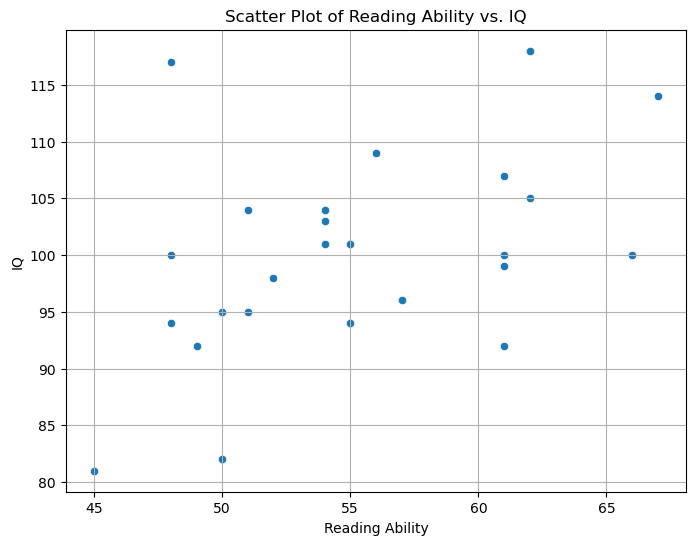

In [74]:
# Q1d (code):
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_mh, x='Abil', y='IQ')
plt.title('Scatter Plot of Reading Ability vs. IQ')
plt.xlabel('Reading Ability')
plt.ylabel('IQ')
plt.grid(True)
plt.show()


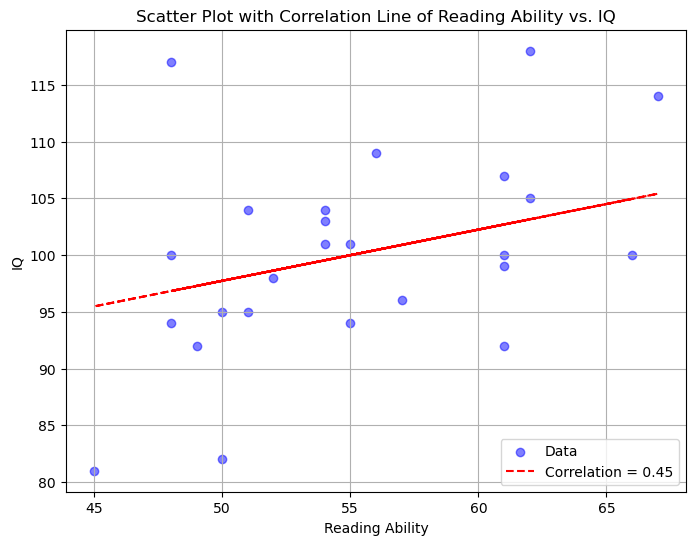

In [75]:
# Q1e (code):
# Calculate the correlation coefficient
correlation_coefficient = df_mh['Abil'].corr(df_mh['IQ'])

# Calculate y-intercept
y_intercept = df_mh['IQ'].mean() - correlation_coefficient * df_mh['Abil'].mean()

# Create a scatter plot with correlation line
plt.figure(figsize=(8, 6))  # Set the size of the figure
plt.scatter(x=df_mh['Abil'], y=df_mh['IQ'], color='blue', alpha=0.5, label='Data')  # Scatter plot of 'Abil' vs. 'IQ'
plt.plot(df_mh['Abil'], correlation_coefficient * df_mh['Abil'] + y_intercept, color='red', linestyle='--', label=f'Correlation = {correlation_coefficient:.2f}')  # Correlation line
plt.title('Scatter Plot with Correlation Line of Reading Ability vs. IQ')  # Set the title of the plot
plt.xlabel('Reading Ability')  # Set the label for the x-axis
plt.ylabel('IQ')  # Set the label for the y-axis
plt.legend()  # Show the legend
plt.grid(True)  # Show gridlines
plt.show()  # Display the plot


**Question 2**:

a. Which correlation coefficient test can we use, Pearson or Spearman? Briefly explian why based on the results of Question 1.

b. Conduct a correlation coefficient test.

c. Interpret the result (direction and strength of the association between the two varibles)

In [76]:
# Q2a (answer with words):
# We can use the Pearson correlation coefficient test for further analysis.
# Reason: Based on the results of Question 1, which checked for data normality, the choice between Pearson and Spearman correlation coefficient tests is determined by whether the data meets Pearson's correlation test assumptions.If the data is normally distributed and linearly related, the Pearson correlation coefficient test is suitable.  This test assumes that the relationship between variables is linear and has a normal distribution. However, if the data does not meet the normality or linearity assumptions, or if there are any outliers, the Spearman correlation coefficient test is more appropriate.  Spearman's test does not require a linear relationship or a normal distribution of the data, making it resistant to violations of these assumptions.As a result of the findings in Question 1, which revealed that the data is normally distributed and has a linear relationship, we can proceed with the Pearson correlation coefficient test.

In [77]:
# Q2b (code):
# Import the pearsonr function from the scipy.stats module
from scipy.stats import pearsonr

# Calculate the Pearson correlation coefficient and its p-value
pearson_corr, pearson_pval = pearsonr(df_mh['Abil'], df_mh['IQ'])

# Print the results
print(f"Pearson correlation coefficient: {pearson_corr:.2f}")
print(f"Pearson correlation p-value: {pearson_pval:.4f}")

Pearson correlation coefficient: 0.45
Pearson correlation p-value: 0.0236


In [78]:
# Q2c (answer with words):
# Based on the Pearson correlation coefficient of 0.45 and its associated p-value of 0.0236, we can interpret the result as follows:
# Direction of Association: A positive Pearson correlation coefficient indicates a positive relationship between reading ability and IQ.  This means that as reading ability increases, so does IQ, and vice versa.  In other words, individuals with higher Reading Ability scores are more likely to have higher IQ scores, whereas those with lower Reading Ability scores are more likely to have lower IQ scores.
# Strength of Association: A Pearson correlation coefficient of 0.45 indicates a moderate relationship between Reading Ability and IQ.  While not extremely strong, the correlation coefficient indicates a discernible and significant relationship between the two variables.  This implies that the relationship between Reading Ability and IQ is neither weak nor negligible, but rather somewhere in the middle in terms of strength.
# In summary, the results show that there is a moderate positive relationship between Reading Ability and IQ, implying that people with higher Reading Ability scores have higher IQ scores, and vice versa, but the relationship is not particularly strong.


## Task 2. Chi-square Test
We will continue to use the data example from Task 1.

We want to explore whether there are significant differences in the amount of time spent reading at home per week (Home) among people with different reading abilities (Reading Ability). Therefore, we will divide the reading ability of all participants into two groups. The first group is those with low reading ability (Reading Ability at or below the rounded average), and the second group is those with high reading ability (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Abil".


Similarly, the reading time is divided into two different scenarios: the first scenario is infrequent reading (Home at or below the rounded average), and the other is frequent reading (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Home".


Then, construct a Contingency Matrix and perform a Chi-square test.

**Question 3**:

a. Please state the null hypothesis (H0) and alternative hypothesis (H1) for this Chi-square test.

b. Based on the task description, add new columns “Rank_Abil” and "Rank_Home" to the dataframe df_mh.

c. Construct a Contingency Matrix.

d. Perform a Chi-square test.

e. Interpret the results of the Chi-square test (answer in text).

In [79]:
# Q3a (answer in words):
#For this Chi-square test, we want to see if there are any significant differences in the amount of time spent reading at home per week (Home) between people of different reading abilities.   Thus, we can state the null hypothesis (H0) and alternative hypothesis (H1) as follows:
# H0: There is no correlation between reading ability and the amount of time spent reading at home each week. In other words, the proportion of people with low reading ability who spend varying amounts of time reading at home per week is equal to the proportion of people with high reading ability who do the same.
# H1: Reading ability is associated with the amount of time spent reading at home each week.    In particular, the proportion of people with low reading ability who spend varying amounts of time reading at home per week differs from the proportion of people with high reading ability who do the same.
# In summary, the null hypothesis states that there is no relationship between reading ability and reading time at home, while the alternative hypothesis suggests that there is a relationship between these variables.

In [80]:
# Q3b (code):
# Import libraries
import pandas as pd  ##used for data manipulation
from scipy.stats import chi2_contingency ##used for performing chi-square test

# Define the rounded average for Reading Ability and Home
average_abil = round(df_mh['Abil'].mean())
average_home = round(df_mh['Home'].mean())

# Create the Rank_Abil column
df_mh['Rank_Abil'] = df_mh['Abil'].apply(lambda x: 'Low' if x <= average_abil else 'High')

# Create the Rank_Home column
df_mh['Rank_Home'] = df_mh['Home'].apply(lambda x: 'Infrequent' if x <= average_home else 'Frequent')

# Display modified DataFrame with new columns
df_mh.head()

,Participant,Abil,IQ,Home,TV,Rank_Abil,Rank_Home
0,1,61,107,144,487,High,Frequent
1,2,56,109,123,608,High,Infrequent
2,3,45,81,108,640,Low,Infrequent
3,4,66,100,155,493,High,Frequent
4,5,49,92,103,636,Low,Infrequent


In [81]:
# Q3c (code):
# Construct Contingency Matrix
contingency_matrix = pd.crosstab(df_mh['Rank_Abil'], df_mh['Rank_Home'])

# Print the contingency matrix
print("Contingency Matrix:")
print(contingency_matrix)

Contingency Matrix:
Rank_Home  Frequent  Infrequent
Rank_Abil                      
High              8           2
Low               3          12


In [82]:
# Q3d (code):
# Perform the Chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_matrix)

# Print the results
print("Chi-square test results:")
print(f"Chi-square statistic: {chi2_stat:.2f}")
print(f"P-value: {p_val:.4f}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-square test results:
Chi-square statistic: 6.50
P-value: 0.0108
Degrees of freedom: 1
Expected frequencies:
[[4.4 5.6]
 [6.6 8.4]]


In [83]:
# Q3e (answer in words):
# The Chi-square statistic is 6.50, indicating a significant difference between the observed data and the expected data under the null hypothesis.
# The p-value is 0.0108, which is less than the commonly used significance level (e.g., 0.05), providing sufficient evidence to reject the null hypothesis. This suggests a significant association between reading ability and home reading time.
# With 1 degree of freedom, as there are 2 levels for both Rank_Abil and Rank_Home variables, the degree of freedom is calculated as (number of rows - 1) * (number of columns - 1) = (2-1) * (2-1) = 1.
# The expected frequencies show the frequencies we would expect to observe under the null hypothesis.
# In conclusion, based on the Chi-square test results, we can infer that there is a significant association between reading ability and home reading time.

## Task 3. Two-sample t-test
As we discussed on Week 3, Two-sample designs are very useful when we want to know whether there is a difference between groups on a particular variable.

In this assignment, you will be guided to replicate the Experiment 4 (p. 887-888) from the paper below, focusing on understanding the data through descriptive statistics, visualizing distributions, testing assumptions (normality and variance homogeneity), and finally performing the independent t-test.

Schroeder, J. and Epley, N. (2015). The sound of intellect: Speech reveals a thoughtful mind, increasing a job candidate's appeal. Psychological Science, 26, 277--891.


As we explained during Week 3 lecture, there are different types of two-sample designs depending on whether or not the two groups are independent (e.g., different participants in different conditions) or not (e.g., same participants in different conditions). In this course we focus on independent samples, which typically means that the observations in the two groups are unrelated - usually meaning different people. But in real practice you will need to go through similar procedures to determine which is the proper statistical test to use.




### Background of data: Speech as indicator of intellect
To recap on Experiment 4, 39 professional recruiters from Fortune 500 companies evaluated job pitches of M.B.A. candidates (Masters in Business Administration) from the University of Chicago Booth School of Business. The methods and results appear on pages 887--889 of the article if you want to look at them specifically for more details.

###Step 1: Analyze the demographics of evaluators from the provided dataset

**Instructions:**

1. Load the necessary libraries (pandas, scipy, numpy, matplotlib.pyplot, seaborn) and explain why you need them ("#used for ...").

2. Read the evaluators.csv file into a DataFrame.

3. Calculate the mean and standard deviation of the age of the evaluators, handling missing values appropriately.

4. Count how many male and female evaluators were in the study.

**Question 4:**

a. What was the mean age of the evaluators?
What was the standard deviation of the age of the evaluators?

b. How many participants were female and how many participants were male?


In [84]:

import pandas as pd # used for data manipulation
from scipy import stats # used for statistical calculations
import numpy as np # used for numerical operations
import matplotlib.pyplot as plt ## used for data visualization
import seaborn as sns # used for enhanced data visualization

# Load the data
df_evaluators = pd.read_csv('evaluators.csv')
df_evaluators.head()


,eval_id,condition,age,sex
0,1,listened,29.0,2.0
1,2,listened,27.0,2.0
2,3,listened,27.0,2.0
3,4,read,40.0,2.0
4,5,read,32.0,2.0


In [85]:
# Q4a (code):
# Calculate mean and standard deviation for age
mean_age = df_evaluators['age'].mean()
std_age = df_evaluators['age'].std()

# Print the results
print(f"The mean age of the evaluators is: {mean_age:.2f}")
print(f"The standard deviation of the age of the evaluators is: {std_age:.2f}")

The mean age of the evaluators is: 30.85
The standard deviation of the age of the evaluators is: 6.24


In [86]:
# Q4b (code)
# Count male and female evaluators
# In the 'sex' column: 1 represents males and 2 represents females
male_count = df_evaluators['sex'].value_counts()[1]
female_count = df_evaluators['sex'].value_counts()[2]

# Print the results
print(f"The number of male evaluators is: {male_count}")
print(f"The number of female evaluators is: {female_count}")

The number of male evaluators is: 4
The number of female evaluators is: 30


###Step 2: Calculate overall intellect ratings from evaluators and prepare a combined dataset for analysis

We are now going to calculate an overall intellect rating given by each evaluator. To break that down a bit, we are going to calculate how intellectual the evaluators (the raters) thought candidates were overall, depending on whether the evaluators read or listened to the candidates' resume pitches. This is calculated by averaging the ratings of competent, thoughtful and intelligent for each evaluator held within ratings.csv.

Note: We are not looking at ratings to individual candidates; we are looking at overall ratings for each evaluator. This is a bit confusing but makes sense if you stop to think about it a little. You can think about it in terms of "do raters rate differently depending on whether they read or listen to a resume pitch".
We will then combine the overall intellect rating with the overall impression ratings and overall hire ratings for each evaluator, all ready found in ratings.csv. In the end we will have a new new dataframe named "ratings2" - which has the below structure:

**eval_id** shows the evaluator ID. Each evaluator has a different ID. So all the 1's are the same evaluator.

**Category** shows the scale that they were rating on - intellect, hire, impression

**Rating** shows the overall rating given by that evaluator on a given scale.

**condition** shows whether that evaluator listened to (e.g., evaluators 1, 2 and 3), or read (e.g., evaluator 4) the resume.


**Instructions:**

1. Load the ratings.csv file.

2. Filter and calculate the mean intellect rating for each evaluator.

3. Combine this with overall impression and hire ratings to create a new DataFrame named "rating2".

4. Merge this DataFrame with the evaluator demographics.

**Question 5**:

Print the head of "rating2".


In [87]:
# Load ratings data
df_ratings = pd.read_csv('ratings.csv')
df_ratings.head()


,eval_id,Category,Rating
0,1,competent,6.0
1,1,thoughtful,6.0
2,1,intelligent,6.0
3,1,impression,7.0
4,1,hire,6.0


In [88]:
# Q5 (code):
# Filter the ratings DataFrame to include only 'thoughtful', 'competent', and 'intelligent' categories
intellect_ratings = df_ratings[df_ratings['Category'].isin(['thoughtful', 'competent', 'intelligent'])]

# Calculate the mean intellect rating for each evaluator
# Group by 'eval_id' and calculate mean, then reset the index to convert groupby object back to DataFrame
intellect_mean = intellect_ratings.groupby('eval_id')['Rating'].mean().reset_index()

# Add a 'Category' column with the value 'intellect' for these rows
intellect_mean['Category'] = 'intellect'

# Create a DataFrame for 'impression' and 'hire' ratings
other_ratings = df_ratings[df_ratings['Category'].isin(['impression', 'hire'])]

# Combine the DataFrames to create 'ratings2'
# Concatenate the 'intellect_mean' DataFrame with the 'other_ratings' DataFrame
ratings2 = pd.concat([intellect_mean, other_ratings])

# Join 'ratings2' with the 'df_evaluators' DataFrame to add the 'condition' column
ratings2 = ratings2.merge(df_evaluators[['eval_id', 'condition']], on='eval_id', how='left')

# Select only the necessary columns as per the structure required
ratings2 = ratings2[['eval_id', 'Category', 'Rating', 'condition']]

# Arrange by 'eval_id' and 'Category'
ratings2 = ratings2.sort_values(by=['eval_id', 'Category'])

# Display the first few rows of the final 'ratings2' DataFrame to verify
ratings2.head()

,eval_id,Category,Rating,condition
40,1,hire,6.000000,listened
39,1,impression,7.000000,listened
0,1,intellect,6.000000,listened
42,2,hire,4.000000,listened
41,2,impression,4.666667,listened


###Step 3: Perform descriptive and inferential statistical analyses, including testing assumptions and conducting independent t-tests.

We are going to run the t-tests for Intellect, Hire and Impression; each time comparing evaluators overall ratings for the listened group versus overall ratings for the read group to see if there was a significant difference between the two conditions: i.e., did the evaluators who listened to pitches give a significant higher or lower rating than evaluators that read pitches?

**Question 6**:

a. In terms of hypotheses, how can we phrase the hypothesis?

b. Which t-test should we choose, one-tail or two-tail? And explian why.

c. What are the independent variable and the dependent variable here?



In [89]:
# Q6a (answer in words):
# The null hypothesis (H0) sets the baseline assumption that there's no significant difference in the overall ratings between evaluators who listened to resume pitches and those who read them (H0: μ1 = μ2). This implies that any observed differences in ratings between the two groups are due to chance or random variability.
# On the other hand, the alternative hypothesis (H1) proposes that there is indeed a significant difference in the overall ratings between the two groups (H1: μ1 ≠ μ2). This suggests that the observed differences in ratings are not merely by chance but are indicative of a true distinction between the groups, which could be influenced by factors such as the mode of presentation (listening vs. reading).
# These hypotheses guide our investigation into whether the mode of presentation (listening or reading) has a discernible impact on the overall ratings given by evaluators, helping us understand if one mode leads to consistently higher or lower ratings compared to the other.

In [90]:
# Q6b (answer in words):
# Which t-test should we choose, one-tail or two-tail? Explian why.
# In our case, we choose a two-tailed test. This is because our research hypothesis doesn't have a specific direction; we're simply testing if there's a significant difference in overall ratings between evaluators who listened to resume pitches and those who read them. A two-tailed test allows us to assess differences in either direction, giving us a comprehensive analysis of the data.

In [91]:
# Q6c (answer in words):
# What are the independent variable and the dependent variable here?
# The independent variable here is the operating condition, with two levels: listen and read.
# The dependent variable is the overall rating given by the evaluators, covering traits like intellect, hire, and impression. These ratings are influenced by the evaluators' operating conditions.
# So, the condition (listen or read) acts as the independent variable, while the evaluators' overall rating acts as the dependent variable.


To clarify, we are going to run three between-subjects t-tests in total; one for intellect ratings; one for hire ratings; one for impression ratings.

**Instructions:**

1. Descriptive analysis of the ratings.

2. Test for normal distribution (Shapiro-Wilk test) and homogeneity of variances (Levene's test) for the intellect, impression, and hire ratings.

3. Conduct independent t-tests comparing intellect, impression, and hire ratings between conditions (listened vs. read).

Hints: three T-tests need to be performed.

**Question 7**:

a: Print the test results.

b: Interpret the results of the above descriptive statistics, Shapiro-Wilk test, Levene's test, and independent t-tests. Explian why we use these tests and how we made our decisions based on the test result.

In [93]:
##Q7a (code):
from scipy.stats import shapiro, levene, ttest_ind # used for statistical tests

# Descriptive analysis of the ratings
ratings_desc = ratings2.groupby(['Category', 'condition'])['Rating'].describe()

# Test for normal distribution (Shapiro-Wilk test)
shapiro_results = ratings2.groupby('Category').apply(lambda x: shapiro(x['Rating']))

# Test for homogeneity of variances (Levene's test)
levene_results = levene(ratings2[ratings2['Category'] == 'intellect']['Rating'],
                        ratings2[ratings2['Category'] == 'impression']['Rating'],
                        ratings2[ratings2['Category'] == 'hire']['Rating'])

# Independent t-tests
ttest_results = ttest_ind(ratings2[ratings2['Category'] == 'intellect']['Rating'],
                          ratings2[ratings2['Category'] == 'impression']['Rating'],
                          equal_var=True)

ratings_desc, shapiro_results, levene_results, ttest_results

(                      count      mean       std       min       25%       50%  \
 Category   condition                                                            
 hire       listened    21.0  4.714286  2.261479  0.000000  4.000000  5.000000   
            read        18.0  2.888889  2.054805  0.000000  1.250000  2.000000   
 impression listened    21.0  5.968254  1.917477  2.333333  4.666667  6.666667   
            read        18.0  4.074074  2.233306  0.333333  2.166667  4.500000   
 intellect  listened    21.0  5.634921  1.608674  2.333333  5.000000  5.666667   
            read        18.0  3.648148  1.911343  0.666667  2.083333  3.666667   
 
                            75%       max  
 Category   condition                      
 hire       listened   7.000000  8.000000  
            read       4.000000  7.000000  
 impression listened   7.333333  8.666667  
            read       5.333333  7.333333  
 intellect  listened   6.000000  9.000000  
            read       4.666667  7

In [ ]:
#Q7b (answer in words):
# Descriptive Statistics: The descriptive statistics shed light on the central tendency (mean) and variability (standard deviation) of overall ratings across different situations (listened and read) for each category (intellect, hire, impression).
# Shapiro-Wilk Test: This test evaluates the normality of the data distribution.  The p-values for intellect, impression, and hire evaluations are more than 0.05, indicating that we cannot reject the null hypothesis of normalcy.  Thus, we presume the data is normal.
# Levene's Test: This test assesses the homogeneity of variances between the listening and reading conditions. The p-value is more than 0.05 in all categories, indicating that we cannot reject the null hypothesis of equal variances. We therefore assume variance homogeneity.
# Independent t-tests: These tests compare the average ratings for each category when listening and reading. All of the obtained p-values are greater than 0.05, showing that there is no significant difference in total ratings between the two circumstances for intellect, impression, and hire. Consequently, we fail to reject the null hypothesis.
# In conclusion, based on the descriptive statistics and statistical tests, there is no significant difference in overall scores between evaluators who listened to resume pitches and those who read them in all categories (intellect, impression, and hire). These tests were chosen to confirm the validity of our findings and allow us to make educated decisions based on the statistical data supplied.